In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn 
from matplotlib import style
sns.set()
style.use('fivethirtyeight')

plt.rcParams["font.family"] = "cursive"                 
plt.rcParams['figure.dpi'] = 150
background_color='#F5F4EF'

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, auc, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

HEADER = '\033[95m'
OKBLUE = '\033[94m'
OKCYAN = '\033[96m'
OKGREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'

class color:
    S = BOLD + OKBLUE +  UNDERLINE   #S = Start
    E = ENDC #E = End

print(color.S+"Libraries loaded"+color.E)

Libraries loaded


# The Problem: Can we predict which water samples are Potable or Non-Potable?

## Analysis of criteria affecting the quality of drinking water

### Loading and Checking Dataset

In [2]:
df=pd.read_csv("water_potability(1).csv")

#####  Show first n rows of data, default is 5

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

##### (what we want to predict) is the 'Potability' column

In [4]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

Typically **before starting any project** it is wise to view & assess the datasets you are provided.

**Data shape** :Number of Rows & Columns
**Data types**:Are all columns integers? Or text? etc.
**Missing data**:Null Values
**Column names**

In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
# df.columns=['ph','H','So','ch','su','co','Oc','T','Tu','P']

In [7]:
#df.rename(columns = {'ph':'P', 'Hardness':'H','Solids':'S',' Chloramines':'Ch','Sulfate':'S','Conductivity':'C','Organic_carbon':'Oc','Trihalomethanes':'Tr','Turbidity':'T','Potability','P'}, inplace = True)

In [8]:
# df.head()

In [9]:
df.shape

(3276, 10)

In [10]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [11]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.0 KB


In [13]:
df.duplicated().sum()

0

In [14]:
null_cols = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col)
        null_cols.append(col)

ph
Sulfate
Trihalomethanes


In [15]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

# EDA: Exploratory Data Analysis

This will help us to understand the data. Are there interesting relationships between variables? Do some variables appear to be a good indiciator for what our target variable will be?
**Next** let's split our data into Training & Test sets An essential step for any predictive Machine Learning task
**Deal with Null Values** We'll deal with them in a way that will not cause data leakage

Text(0.5, 1.0, 'Potability')

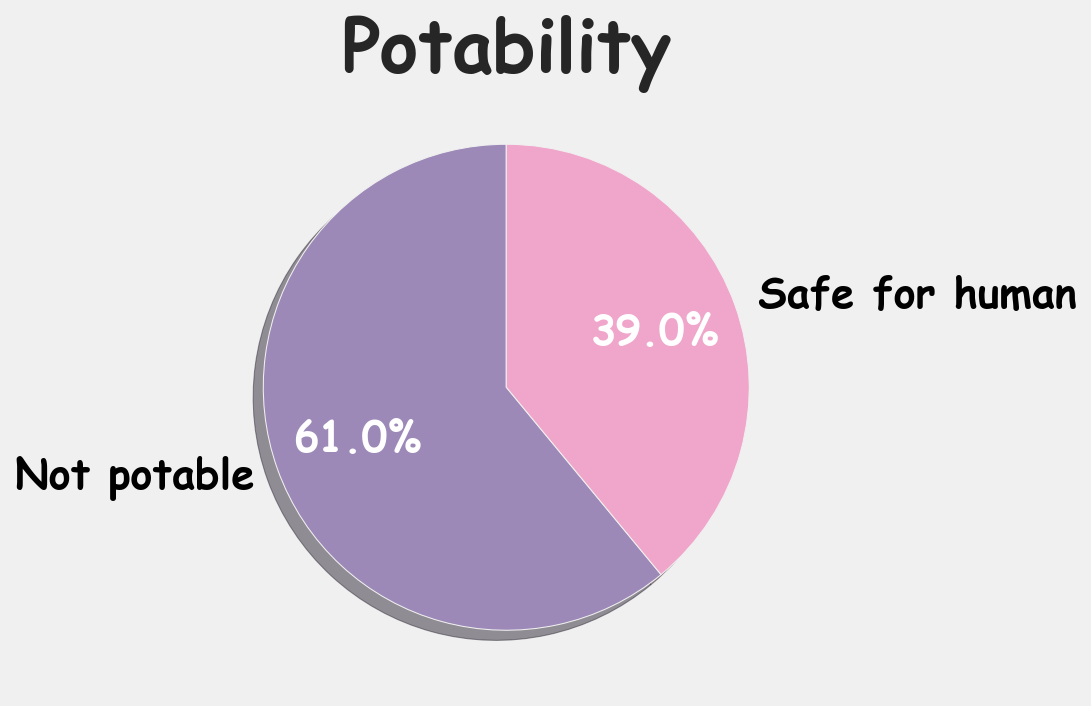

In [16]:
pie_colors = ('#9c89b8','#f0a6ca')
pred_classes = df.Potability.value_counts()

plt.figure(figsize=(5, 5))
patches, texts, pcts = plt.pie(pred_classes,
                               labels=['Not potable' ,'Safe for human'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 20,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'cursive'})
plt.setp(pcts, color='white')

hfont = {'fontname':'cursive', 'weight': 'bold'}
plt.title('Potability', size=35, **hfont)

Most of our samples are non-potable

In [17]:
mis_val_colors = []

for col in df.columns:
    if df[col].isna().sum() != 0:
        mis_val_colors.append('#9c89b8')
    else:
        mis_val_colors.append('#f0a6ca')

Text(0.5, 1.15, 'Missing values (Before)')

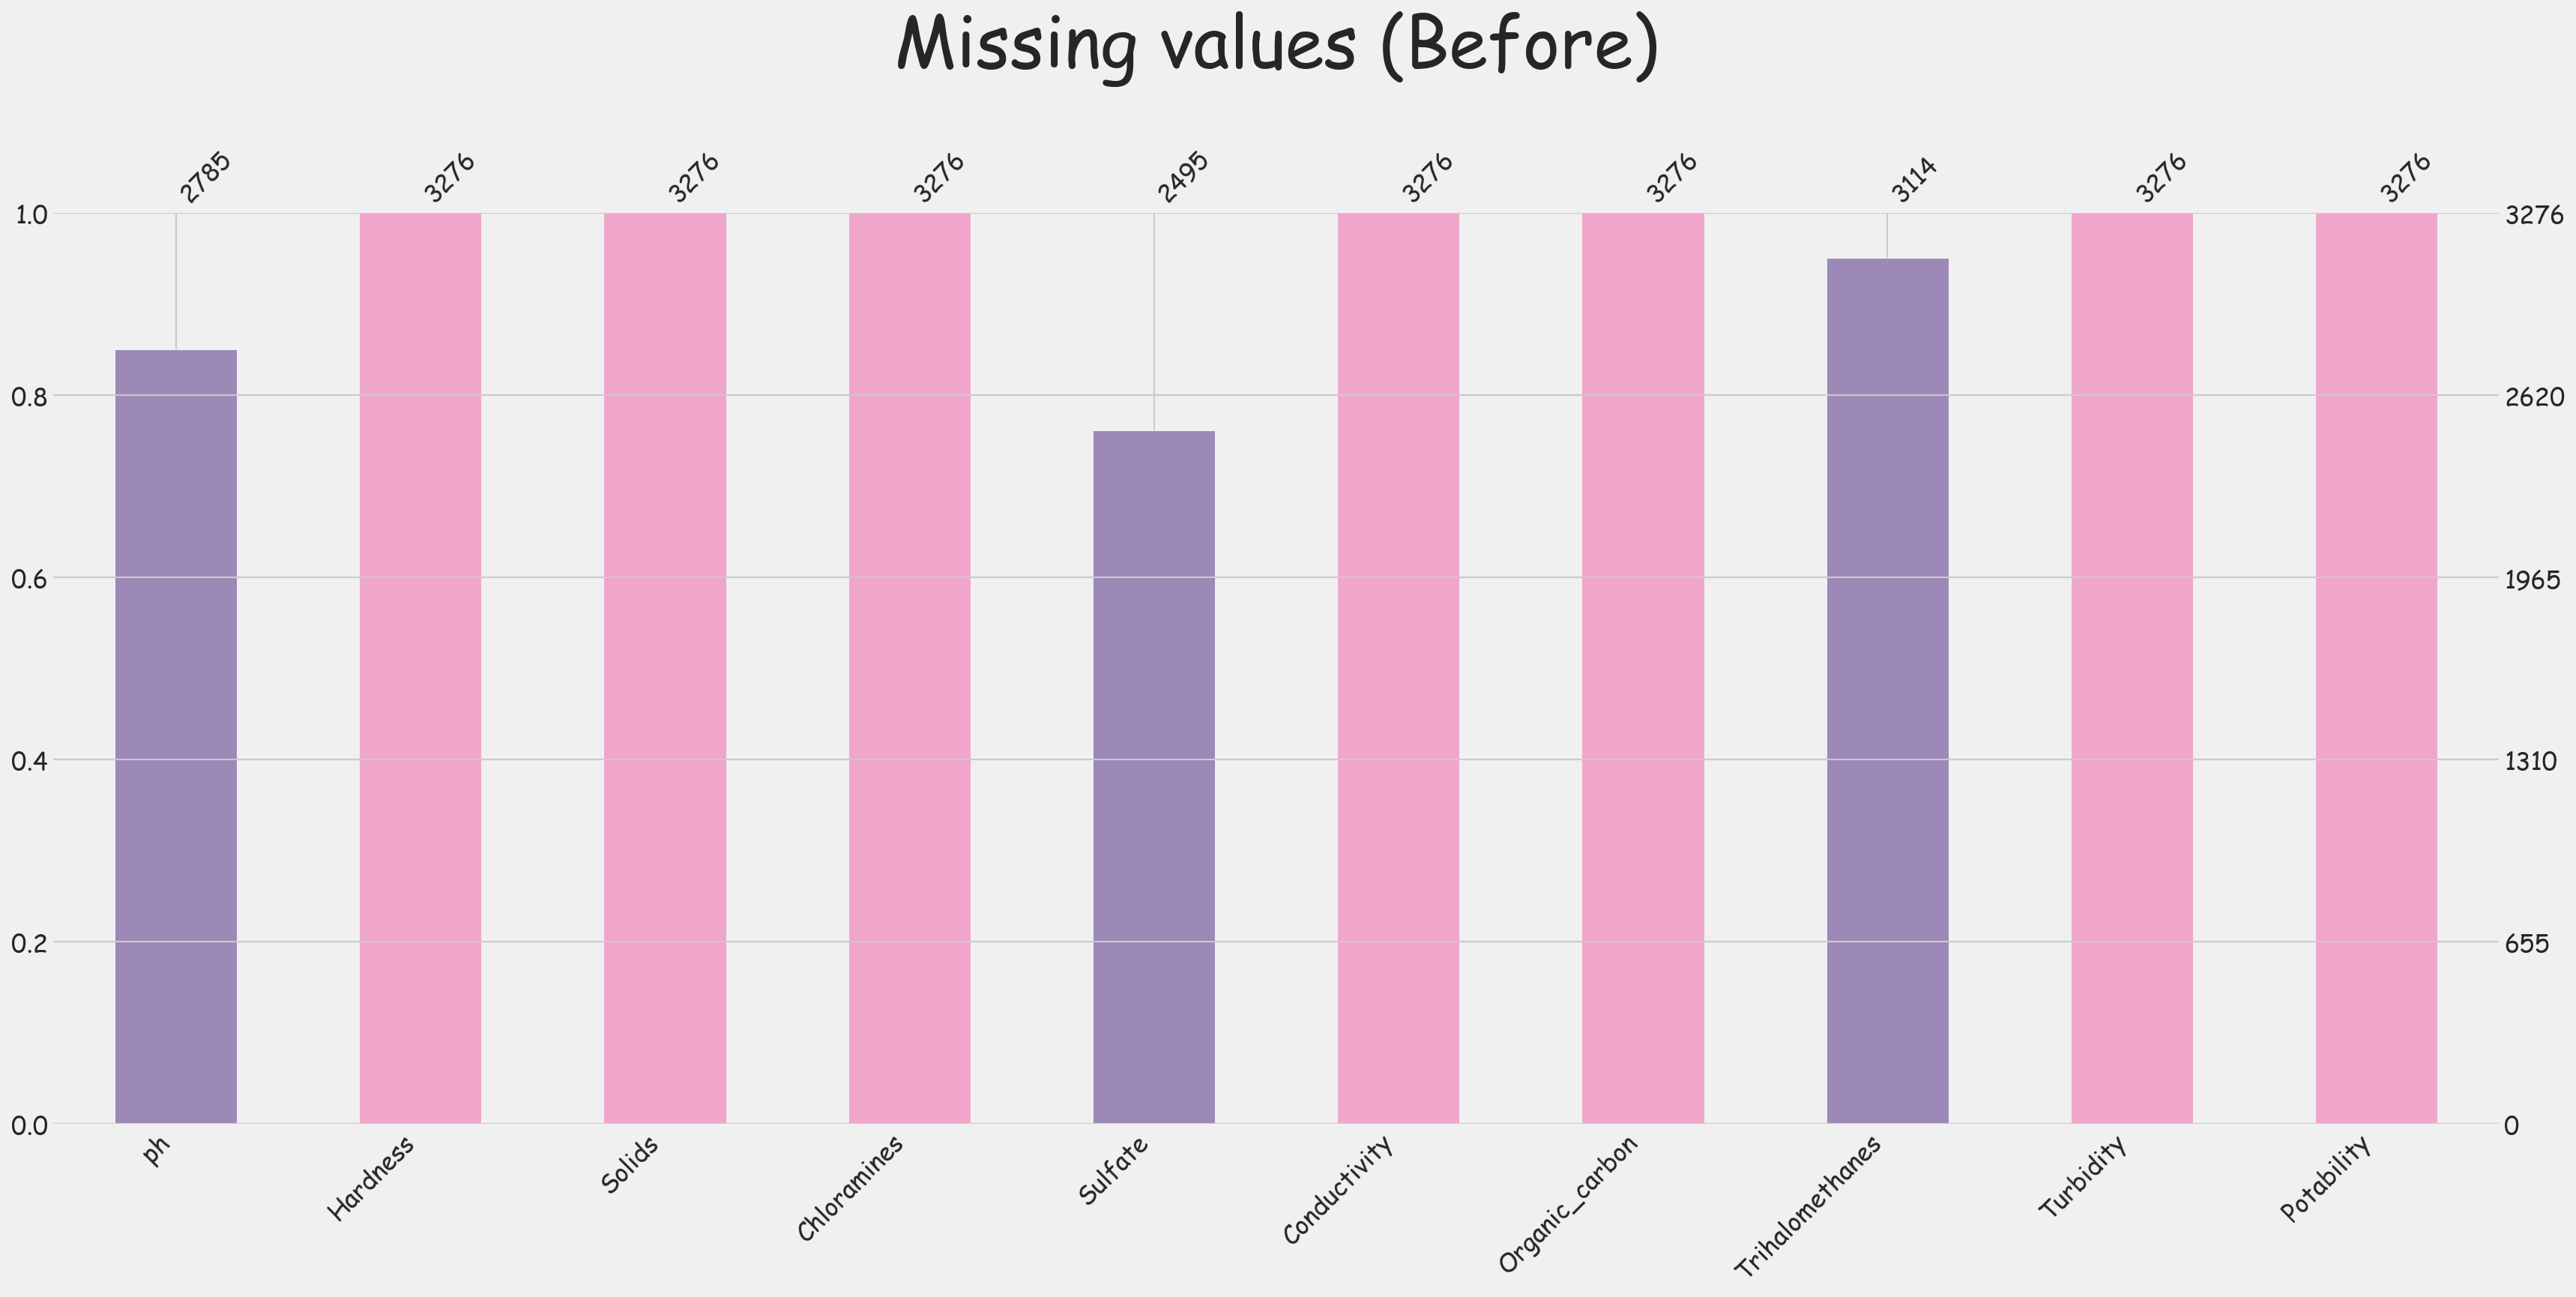

In [18]:
msn.bar(df, color=mis_val_colors)
plt.title('Missing values (Before)', size=45, y=1.15)

In [19]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [20]:
# df = df.dropna()

In [21]:
# mis_val_colors_after = []

# for col in df.columns:
#     if df[col].isna().sum() != 0:
#         mis_val_colors_after.append('#DEBC74')
#     else:
#         mis_val_colors_after.append('#DEBC74')

In [22]:
# msn.bar(df, color=mis_val_colors_after)
# plt.title('Missing values (After)', size=45, y=1.15)

In [23]:
#### Distribution of predicted values in the dataset

In [24]:
# pie_colors = ('#E2E0D4', '#DEBC74')
# pred_classes = df.Potability.value_counts()

# plt.figure(figsize=(8, 8))
# patches, texts, pcts = plt.pie(pred_classes,
#                                labels=[ 'Safe for human','Not potable'],
#                                colors=pie_colors,
#                                pctdistance=0.65,
#                                shadow=True,
#                                startangle=90,
#                                autopct='%1.1f%%',
#                                textprops={'fontsize': 30,
#                                           'color': 'black',
#                                           'weight': 'bold',
#                                           'family': 'cursive'})
# plt.setp(pcts, color='white')

# plt.title('Potability', size=35, **hfont)

**Conclusion**
After working with the missing data, we were able to balance a little bit the number of elements in the classes for the predicted variable

In [25]:
# df.Potability.value_counts()

In [26]:
# df.shape

### What about the distribution of our variables in relation to potability?

In [27]:
variables = df.columns[:-1]
variables

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [28]:
# Data=df.select_dtypes(exclude='object').columns.tolist()
# fig,ax=plt.subplots(2,5,figsize=(20,10))
# for i,d in enumerate(Data):
#     fig.sca(ax[i])
#     sns.kdeplot(data=df,x=d)
#     plt.title(f"{d}")

##### I'll plot all of our 9 variables against one another to see if we can view anything en masse that could be worth exploring.

In [29]:
def n_choose_k_unordered_combinations(n,k):
    import math
    print(color.S+"Unordered Combinations"+color.E)
    print(int(math.factorial(n)/(math.factorial(k)*(math.factorial(n-k)))),f"ways to choose {k} items from {n}")
    
n_choose_k_unordered_combinations(9,2)

Unordered Combinations
36 ways to choose 2 items from 9


In [30]:
import itertools
combinations = list(itertools.combinations(variables, 2))
print(len(combinations))
combinations

36


[('ph', 'Hardness'),
 ('ph', 'Solids'),
 ('ph', 'Chloramines'),
 ('ph', 'Sulfate'),
 ('ph', 'Conductivity'),
 ('ph', 'Organic_carbon'),
 ('ph', 'Trihalomethanes'),
 ('ph', 'Turbidity'),
 ('Hardness', 'Solids'),
 ('Hardness', 'Chloramines'),
 ('Hardness', 'Sulfate'),
 ('Hardness', 'Conductivity'),
 ('Hardness', 'Organic_carbon'),
 ('Hardness', 'Trihalomethanes'),
 ('Hardness', 'Turbidity'),
 ('Solids', 'Chloramines'),
 ('Solids', 'Sulfate'),
 ('Solids', 'Conductivity'),
 ('Solids', 'Organic_carbon'),
 ('Solids', 'Trihalomethanes'),
 ('Solids', 'Turbidity'),
 ('Chloramines', 'Sulfate'),
 ('Chloramines', 'Conductivity'),
 ('Chloramines', 'Organic_carbon'),
 ('Chloramines', 'Trihalomethanes'),
 ('Chloramines', 'Turbidity'),
 ('Sulfate', 'Conductivity'),
 ('Sulfate', 'Organic_carbon'),
 ('Sulfate', 'Trihalomethanes'),
 ('Sulfate', 'Turbidity'),
 ('Conductivity', 'Organic_carbon'),
 ('Conductivity', 'Trihalomethanes'),
 ('Conductivity', 'Turbidity'),
 ('Organic_carbon', 'Trihalomethanes'),
 

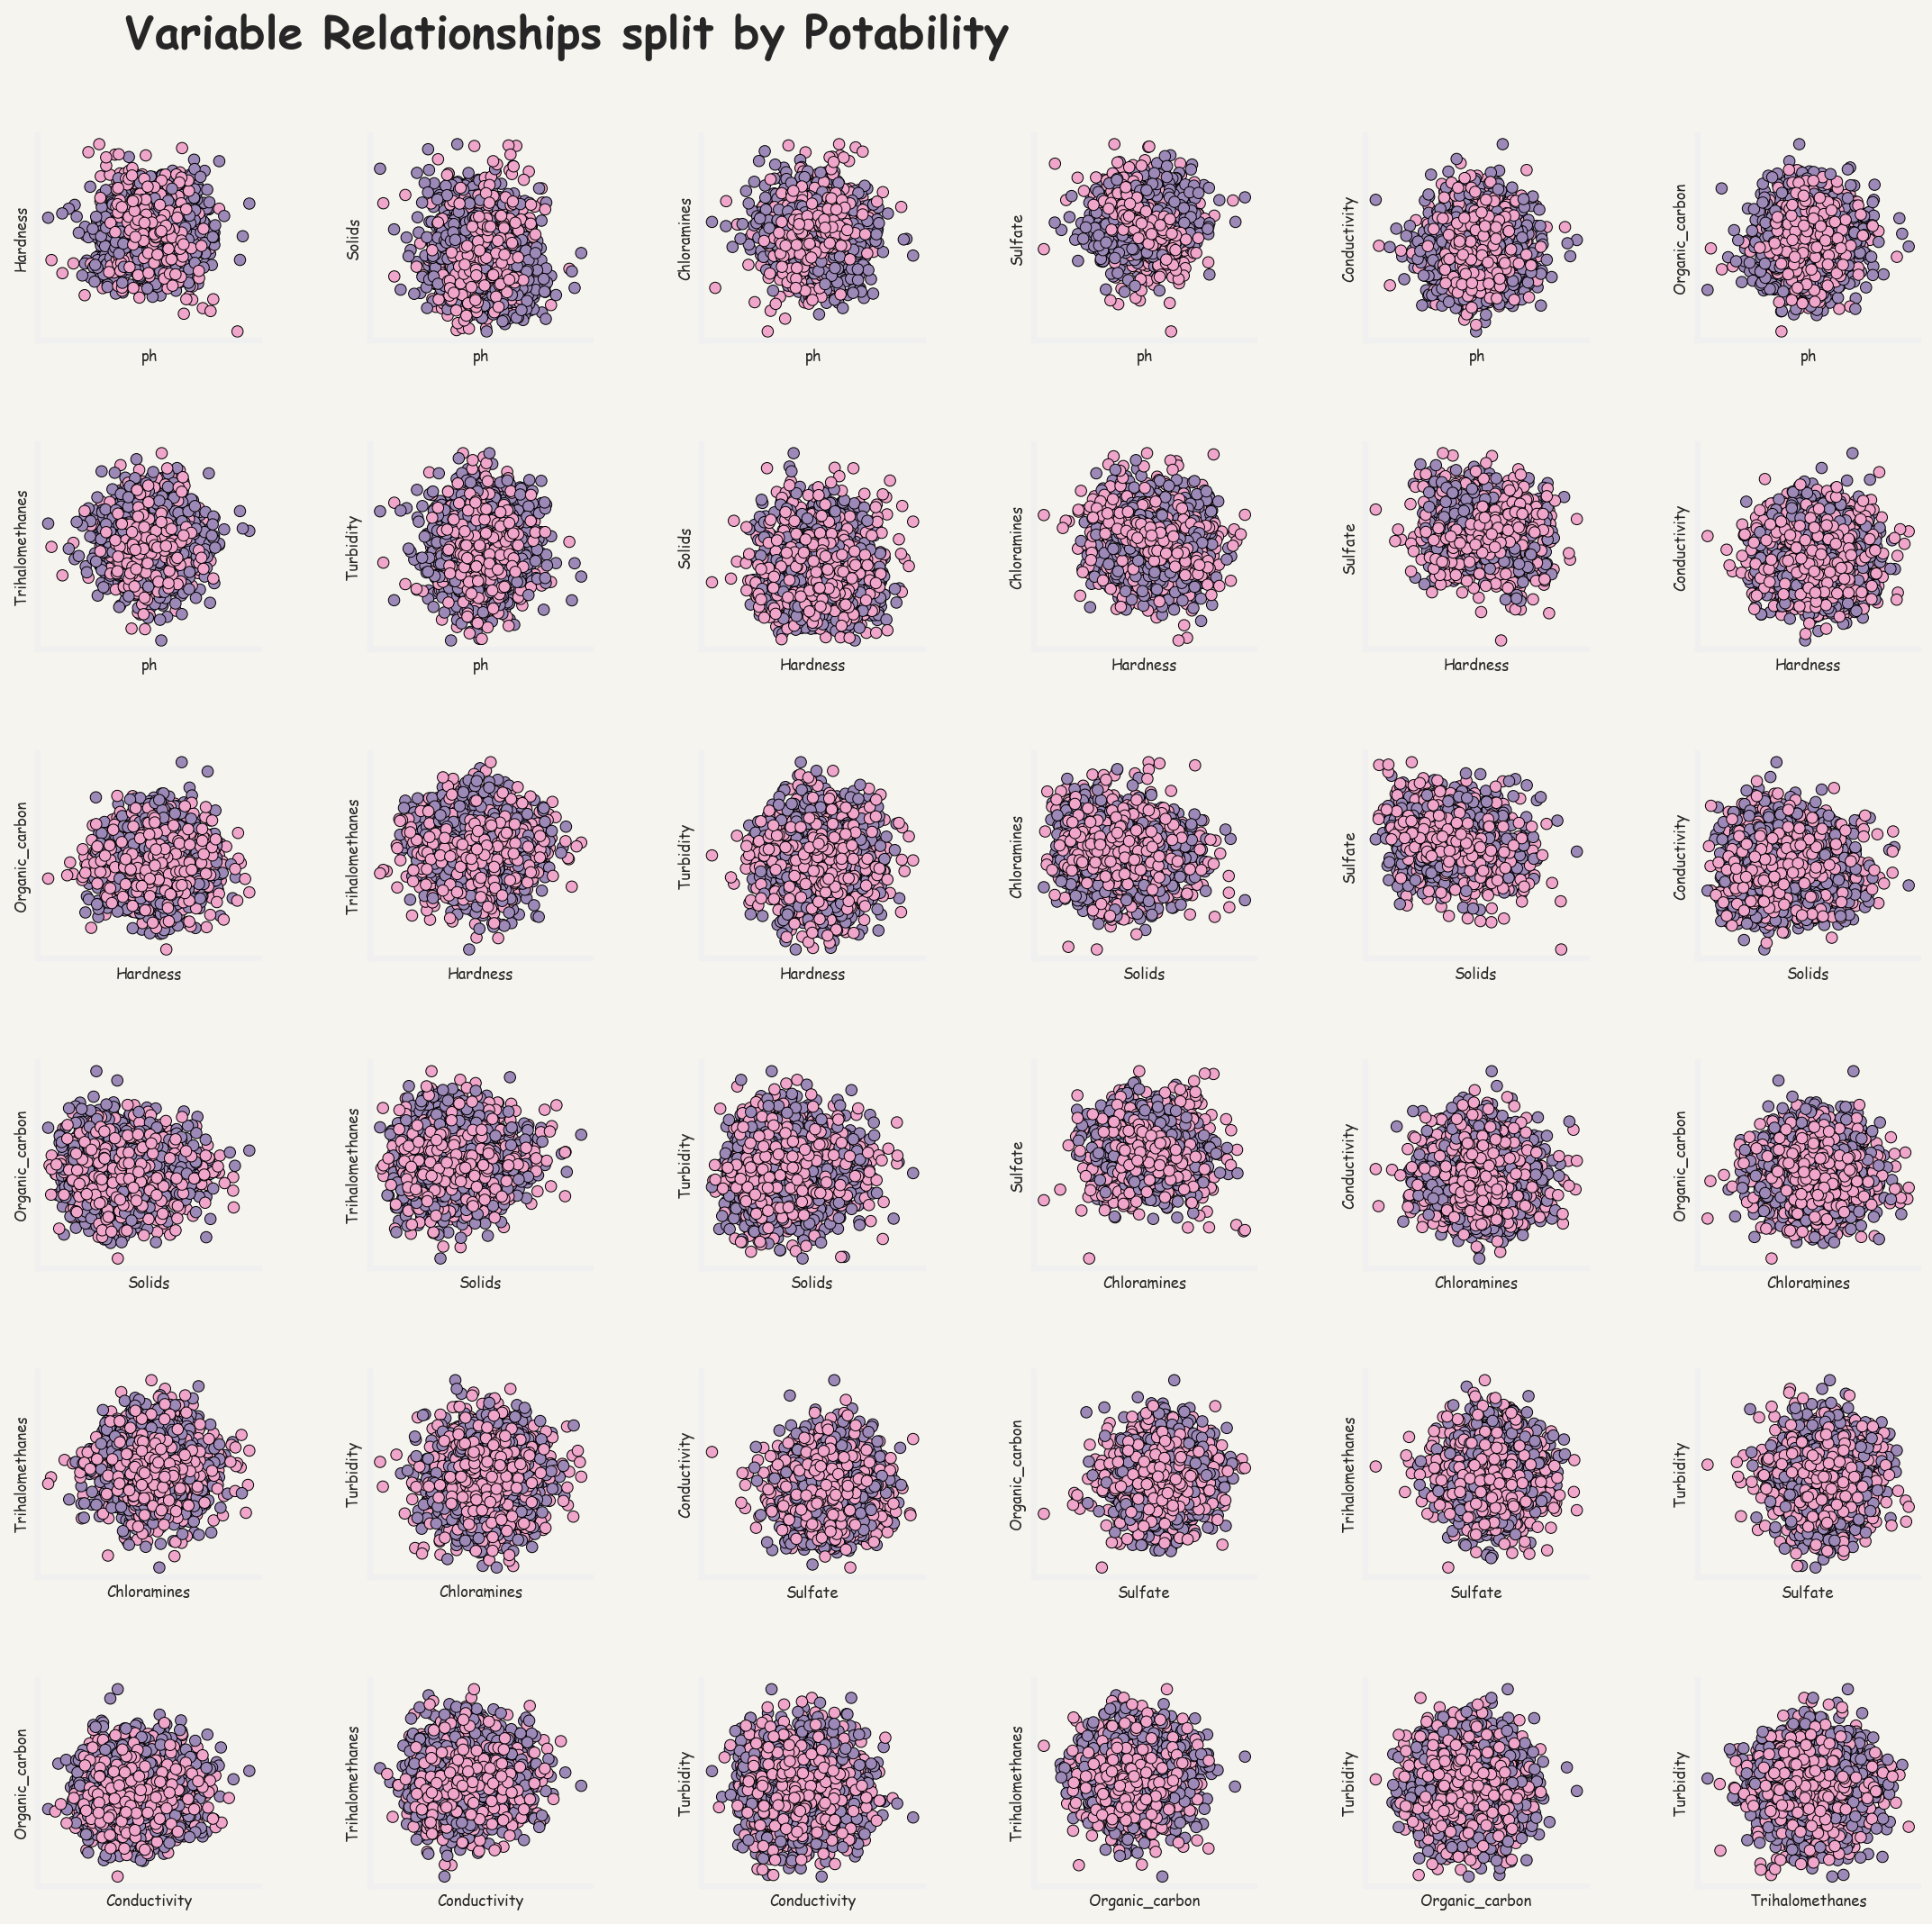

In [31]:
fig = plt.figure(figsize=(16, 16), facecolor=background_color)

plot = 0 

combinations = list(itertools.combinations(variables, 2))

for item in combinations:
            
        plot += 1
        
        plt.subplot(6 , 6, plot, facecolor=background_color)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        
        sns.scatterplot(x=item[0] ,y=item[1] , data=df, hue=df['Potability'], palette=['#9c89b8','#f0a6ca'], ec='black', lw=1.5, legend=False)
        sns.despine()
        
        plt.ylabel(item[1], fontsize=8)
        plt.xlabel(item[0], fontsize=8)
        plt.yticks([])
        plt.xticks([])        
        
fig.text(0.12,0.92,'Variable Relationships split by Potability', fontsize=24, fontweight='bold')
plt.show()

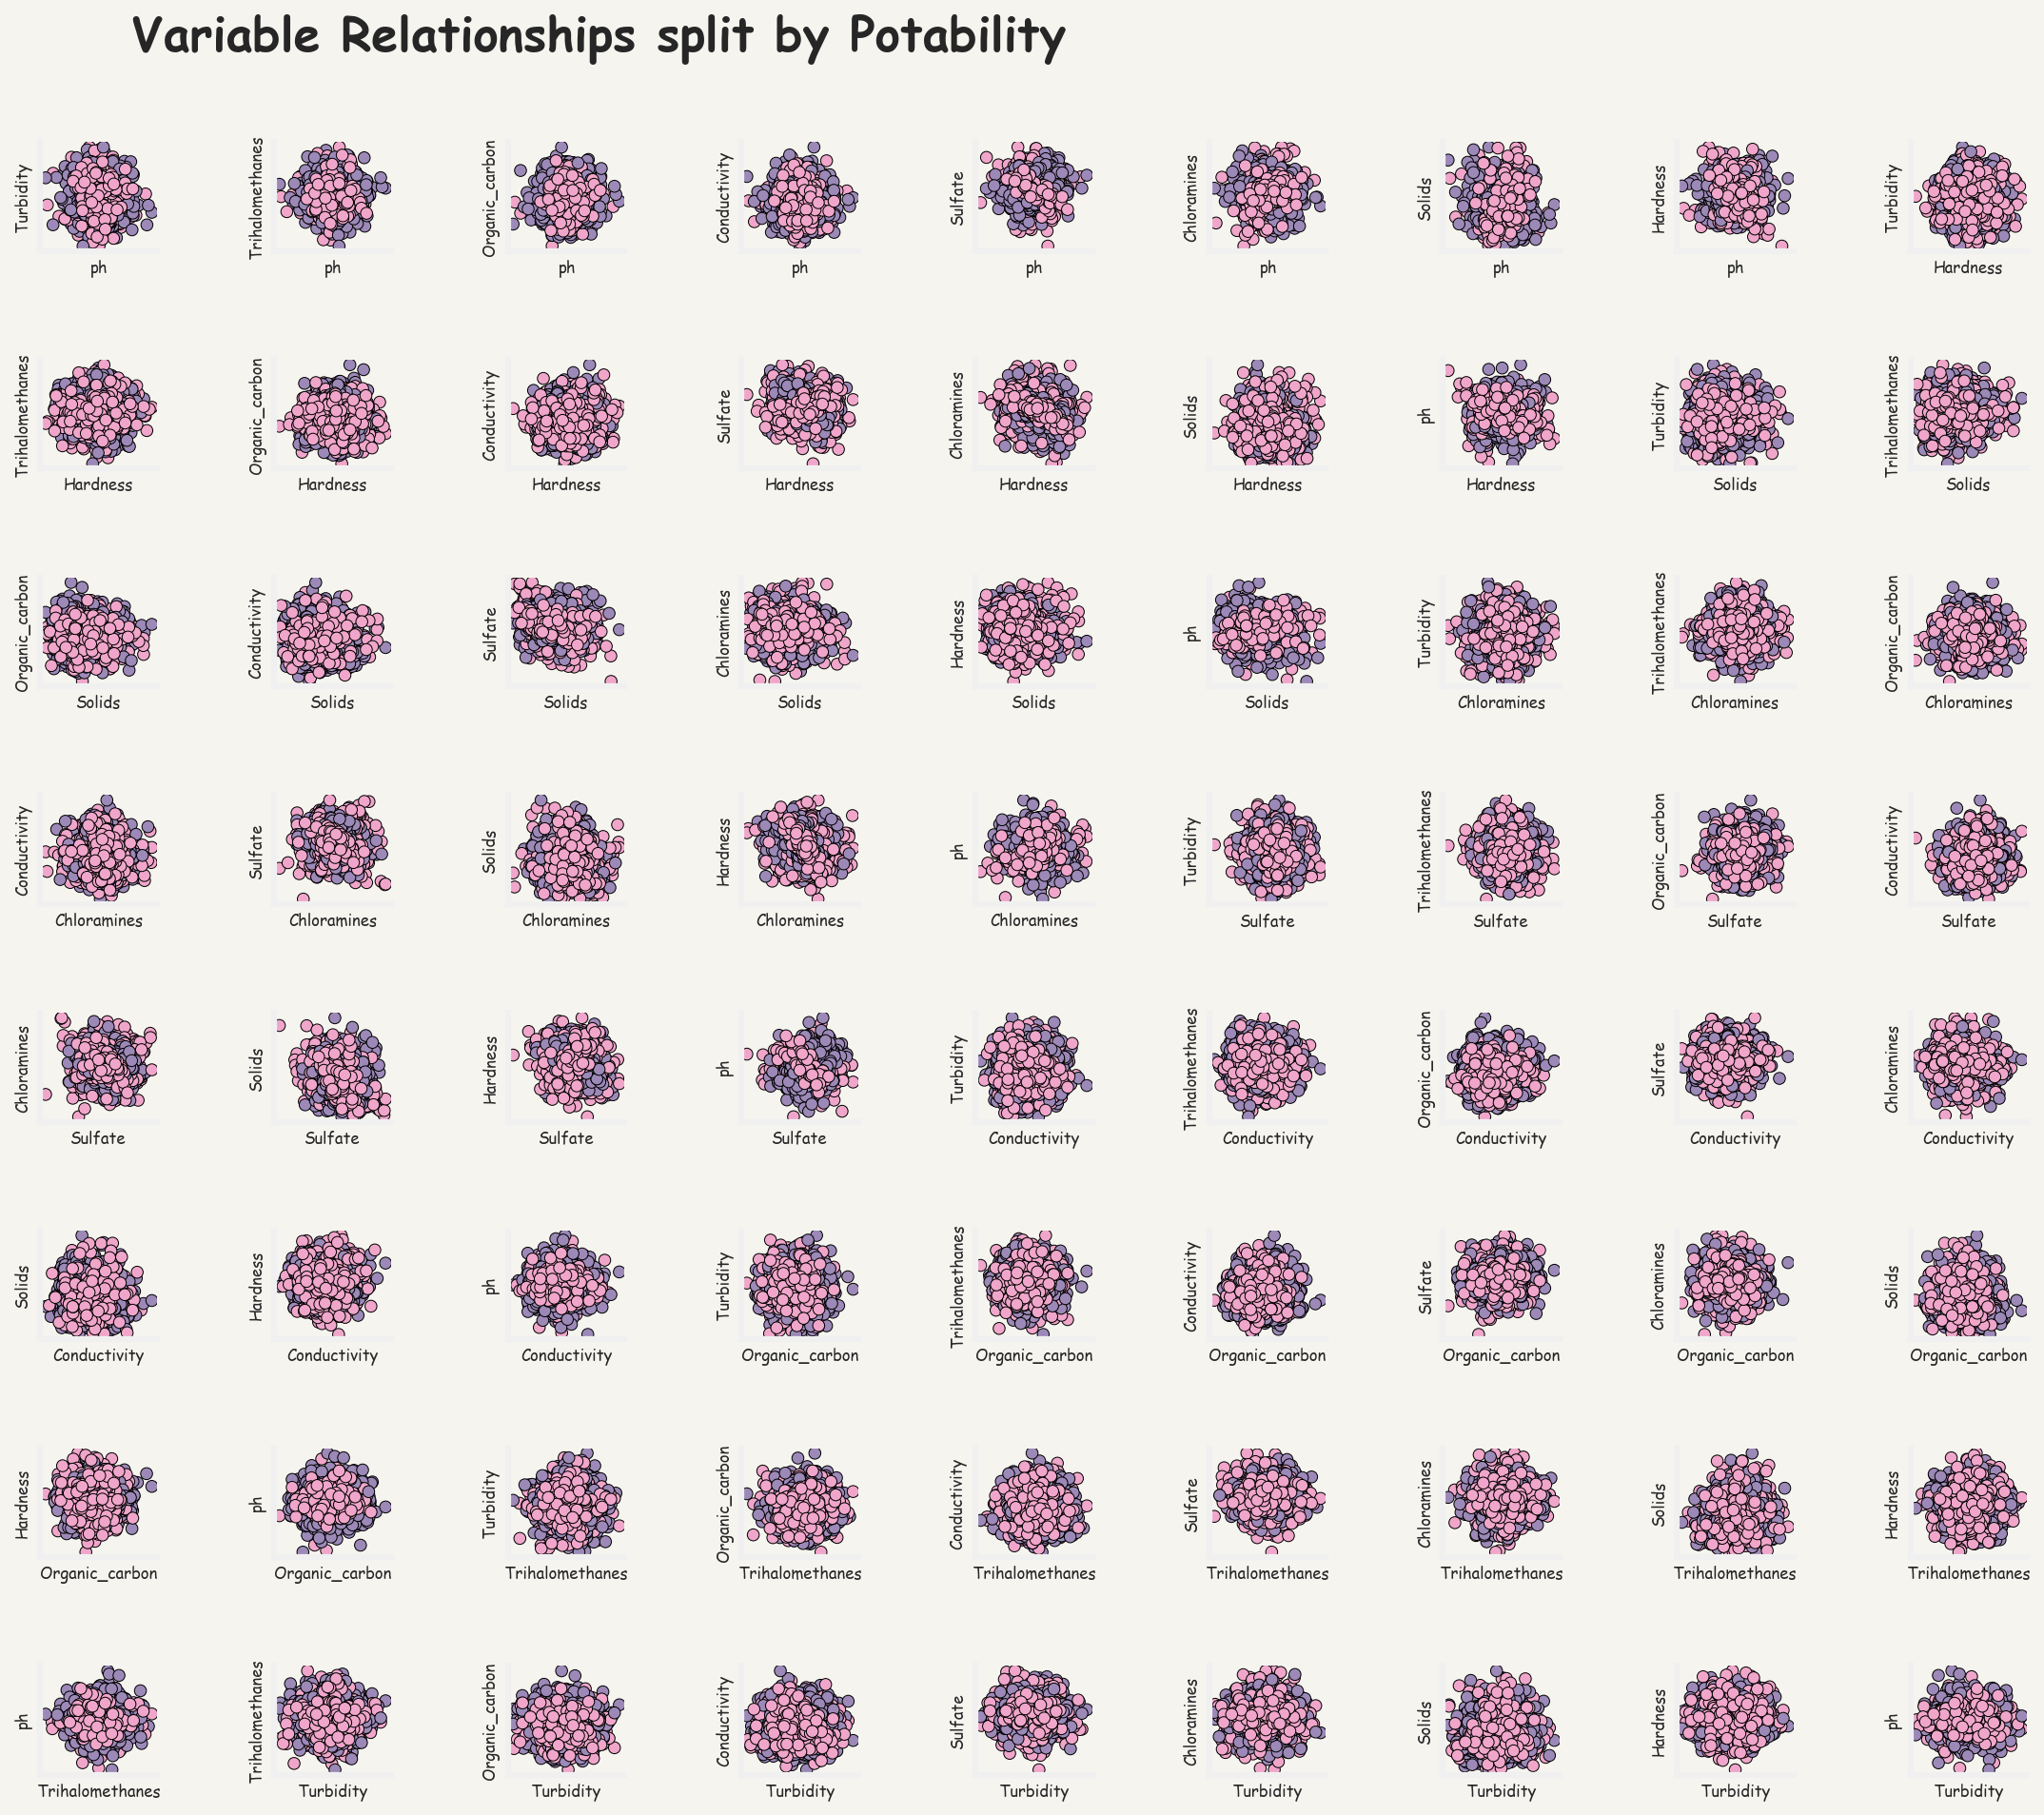

In [32]:
fig = plt.figure(figsize=(16, 16), facecolor=background_color)

plot = 0 

for x in variables:
    for y in variables[::-1]:
        if x==y: continue
            
        plot += 1
        
        plt.subplot(9 , 9, plot, facecolor=background_color)
        plt.subplots_adjust(hspace=1, wspace=1)
        
        sns.scatterplot(x=x ,y=y , data=df, hue=df['Potability'], palette=['#9c89b8','#f0a6ca'], ec='black', lw=1.5, legend=False)
        sns.despine()
        
        plt.ylabel(y, fontsize=8)
        plt.xlabel(x, fontsize=8)
        plt.yticks([])
        plt.xticks([])
        
fig.text(0.12,0.92,'Variable Relationships split by Potability', fontsize=24, fontweight='bold')
plt.show()



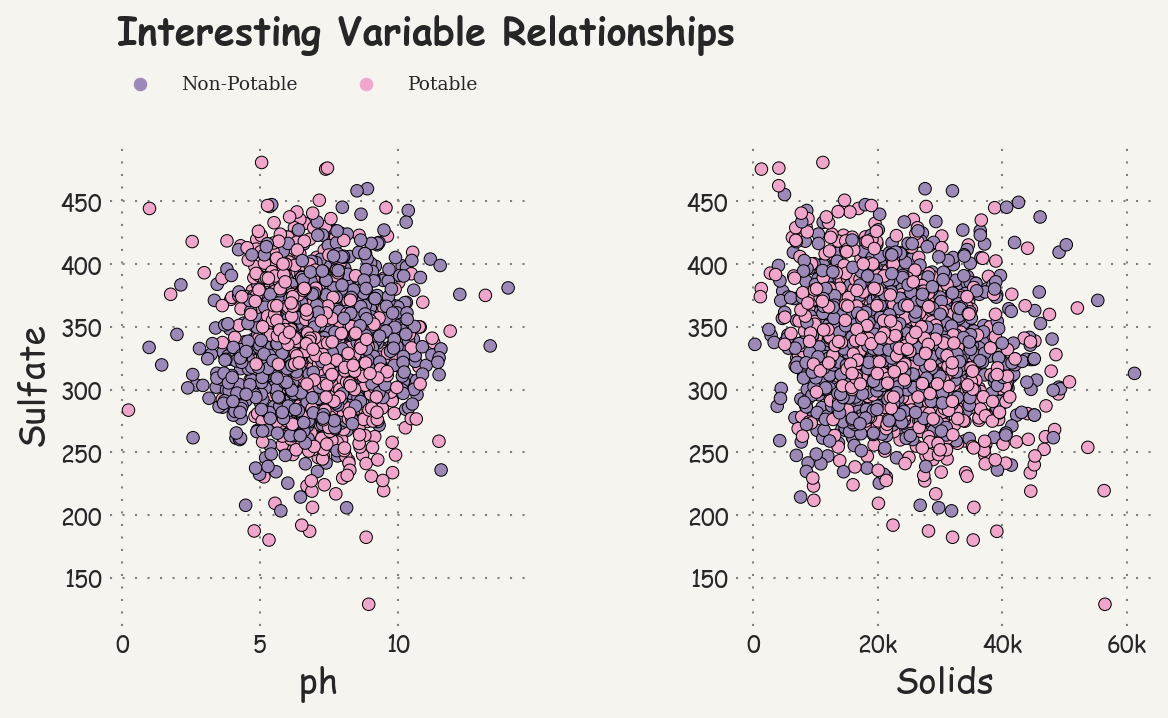

In [33]:
fig = plt.figure(figsize=(8,4), facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.5, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

sns.scatterplot(data=df, x='ph', y='Sulfate', hue='Potability',palette=['#9c89b8','#f0a6ca'], ec='black', lw=1.5, ax=ax0)
sns.scatterplot(data=df, x='Solids', y='Sulfate', hue='Potability',palette=['#9c89b8','#f0a6ca'], ec='black', lw=1.5, legend=False, ax=ax1)
     
for i in range(0, 2):
        locals()["ax"+str(i)].tick_params(axis='both', which='both', length=0)
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].grid(which='both', axis='both', zorder=5, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(i)].set_axisbelow(True)
        for s in ["top","right","left","bottom"]:
            locals()["ax"+str(i)].spines[s].set_visible(False)

ax1.set_ylabel('')

def x_formatter(x, pos):
    """The two args are the value and tick position"""
    if x <= 0:
        label = '0'

    elif x >= 1e6:
        label = '{:1.1f}M'.format(x*1e-6)
        
    else:
        label = '{:1.0f}k'.format(x*1e-3)
    return label

ax1.xaxis.set_major_formatter(x_formatter)

# Legend

L = ax0.legend(frameon=False,loc="upper center", bbox_to_anchor=(0.45, 1.18), ncol= 2)
plt.setp(L.texts, family='serif', size=9) 
L.get_frame().set_facecolor('none')
L.get_texts()[0].set_text('Non-Potable')
L.get_texts()[1].set_text('Potable')

ax0.text(-0.2,575,'Interesting Variable Relationships', fontsize=18, fontweight='bold')

plt.show()

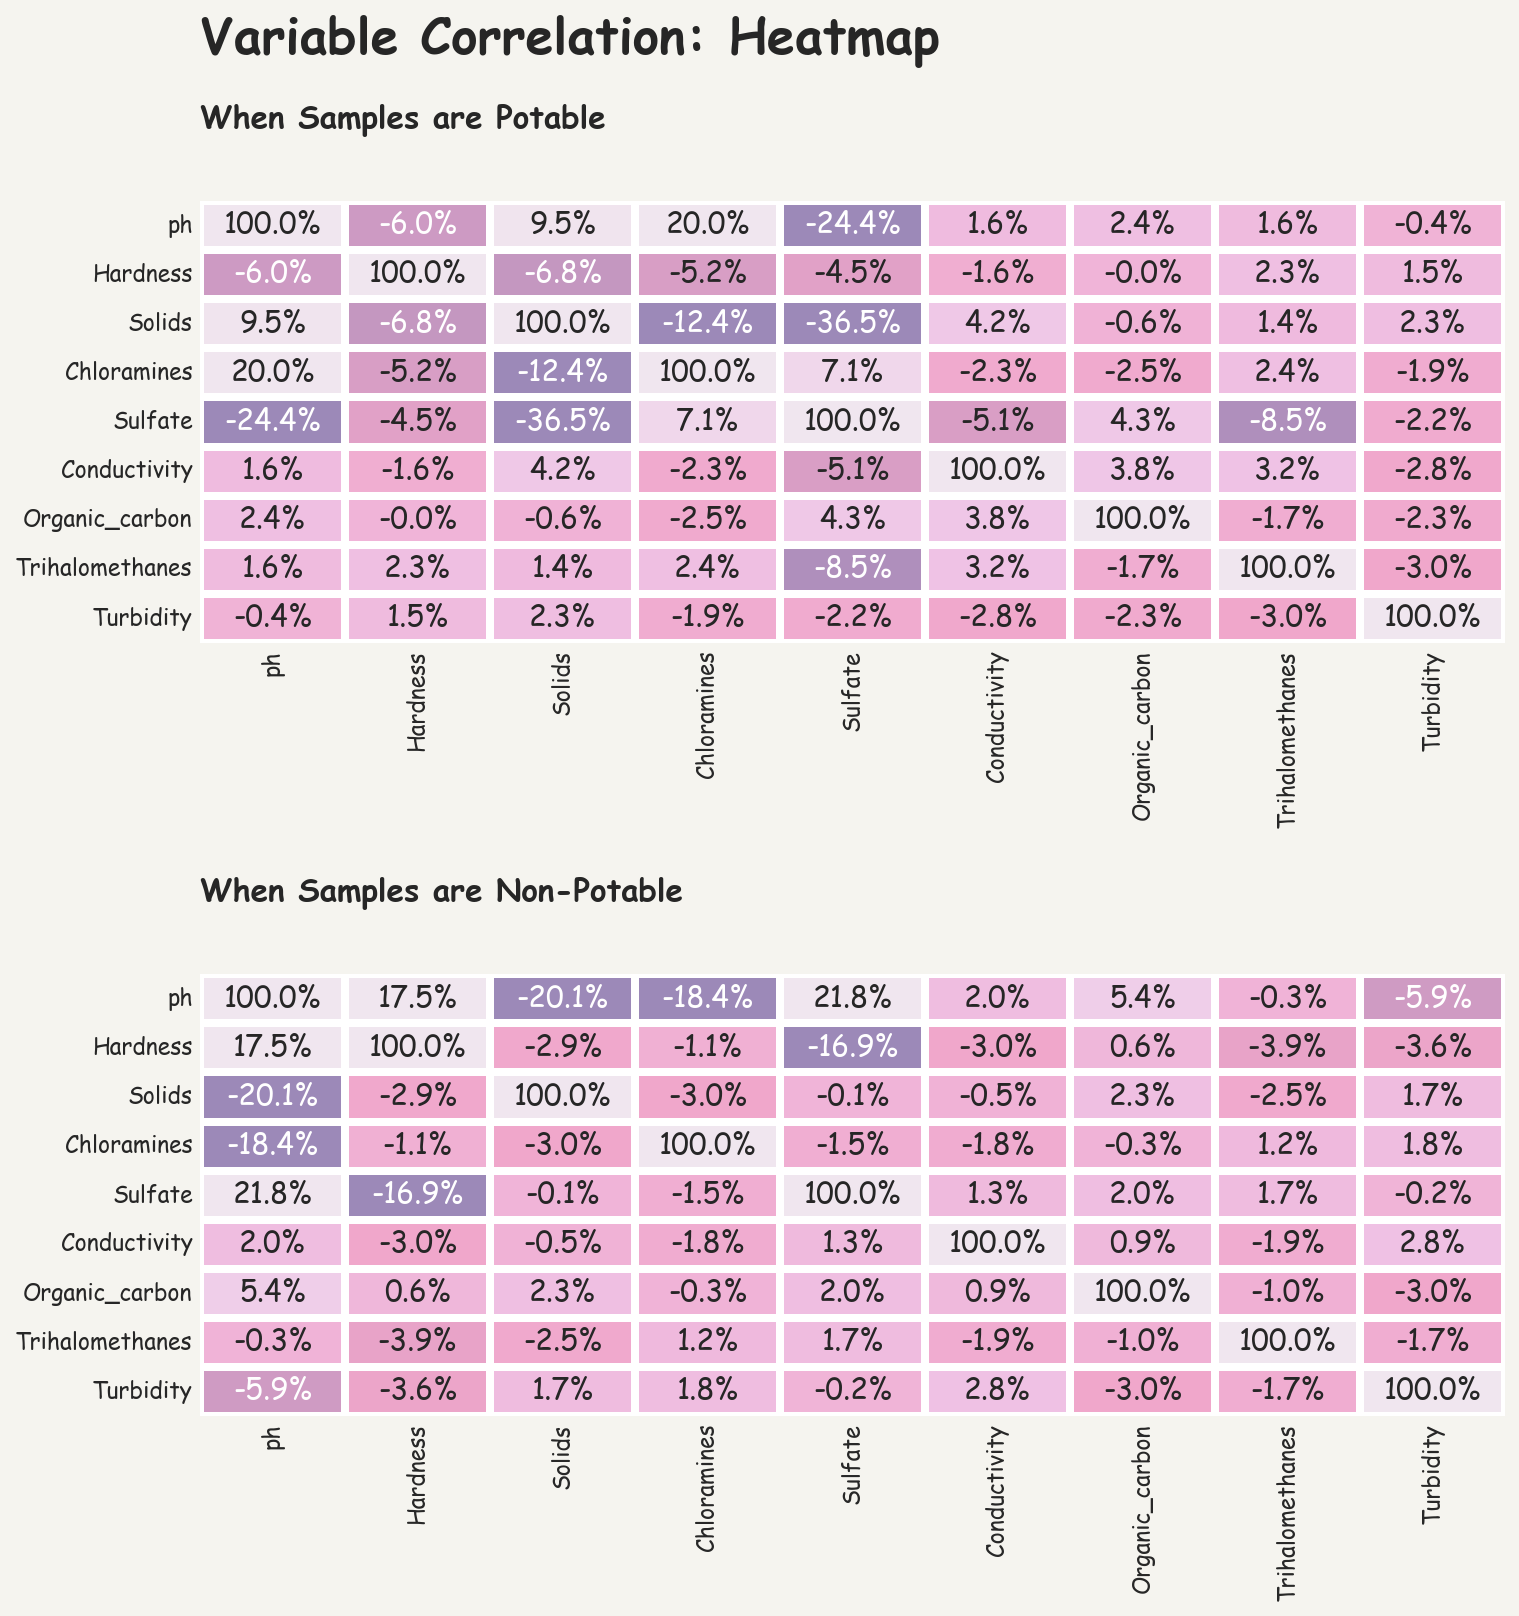

In [34]:
# Custom color map
colors = ['#9c89b8','#f0a6ca', "#efc3e6","#f0e6ef"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig = plt.figure(figsize=(10,10), facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.5, hspace=0.75)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,:])

corr_1 = df.query("Potability == 1")[variables].corr()
corr_0 = df.query("Potability == 0")[variables].corr()

sns.heatmap(corr_1, linewidth=3, annot=True, fmt='.1%', cbar=False, cmap=colormap, vmin=-0.1, vmax=0.1, ax=ax0)
sns.heatmap(corr_0, linewidth=3, annot=True, fmt='.1%', cbar=False, cmap=colormap, vmin=-0.1, vmax=0.1, ax=ax1)

for i in range(0, 2):
        locals()["ax"+str(i)].tick_params(axis='both', which='both', length=0)
        locals()["ax"+str(i)].set_facecolor(background_color)
# Text
ax0.text(0,-3,'Variable Correlation: Heatmap',fontsize=24, fontweight='bold')
ax0.text(0,-1.5,'When Samples are Potable',fontsize=15, fontweight='bold')

ax1.text(0,-1.5,'When Samples are Non-Potable',fontsize=15, fontweight='bold')


plt.show()

## Splitting our data

In [35]:
X = df.drop(['Potability'], axis=1)
y = df['Potability']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
null_cols = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col)
        null_cols.append(col)

ph
Sulfate
Trihalomethanes


In [37]:
for i in null_cols:
    print(i, "Train ",X_train[i].mean())
    print(i, "Test ",X_test[i].mean())

ph Train  7.088975549029737
ph Test  7.048289460392541
Sulfate Train  333.65330158520135
Sulfate Test  334.2572051205811
Trihalomethanes Train  66.35513177285068
Trihalomethanes Test  66.56153418118986


**Dealing with Missing Values**
I will impute the missing values as simply the mean for the column.
I will use calculate the mean of the training set only to prevent data leakage.
If you use the mean of the entire dataset, you are gaining information from your test data, and as such, you may overfit to our specific case. We want our model to be able to deal with unseen data.

In [38]:
#to make sure there is no missing value
for dataframe in [X_train, X_test]:
    for column in variables:
        column_value=X_train[column].mean()
        dataframe[column].fillna(column_value, inplace=True)           

In [39]:
print(color.S+"Null Values:"+color.E)
for dataframe in [X_train, X_test]:
    print(dataframe.isnull().sum().sum())

Null Values:
0
0


### Modelling

There are several methods of scaling data
**Two popular methods are z-standardisation & Min-Max Scaling**
**Z-standardisation represents how many standard deviations a point is from the mean ,Whilst Min-Max scaling transforms the data so that it is between 0 & 1.**

In [40]:
min_max_scaler = MinMaxScaler()
X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)
X_test_min_max_scaled = min_max_scaler.transform(X_test)

standard_scaler = StandardScaler()
X_train_stand_scaled = standard_scaler.fit_transform(X_train)
X_test_stand_scaled = standard_scaler.transform(X_test)

In [41]:
X_train_min_max_scaled = pd.DataFrame(X_train_min_max_scaled, columns=variables)
X_test_min_max_scaled = pd.DataFrame(X_test_min_max_scaled, columns=variables)

X_train_stand_scaled = pd.DataFrame(X_train_stand_scaled, columns=variables)
X_test_stand_scaled = pd.DataFrame(X_test_stand_scaled, columns=variables)

In [42]:
X_train_stand_scaled.head(3).style.set_caption('X Train: Standard Scaling')

In [43]:
X_train_min_max_scaled.head(3).style.set_caption('X Train: Min-Max Scaling')

In [44]:
#The Null accuracy would be the score if you always predicted the most common classification:In this case all zeroes.
print(color.S+"Null Accuracy Score:"+color.E,round(y_test.value_counts()[0]/(y_test.value_counts().sum()),4))

Null Accuracy Score: 0.628


In [45]:
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train_min_max_scaled, y_train)
log_pred_min_max = logistic_regression.predict(X_test_min_max_scaled)

print(color.S+'Model accuracy score:'+color.E,' {0:0.4f}'. format(accuracy_score(y_test, log_pred_min_max)))
print(color.S+'Confusion Matrix:'+color.E,'\n',confusion_matrix(y_test, log_pred_min_max))

Model accuracy score:  0.6280
Confusion Matrix: 
 [[412   0]
 [244   0]]


In [46]:
np.unique(log_pred_min_max)

array([0], dtype=int64)

### First, I will run through the models using the unscaled data, then I will repeat using scale data.

In [47]:
models = {
    "Logistic Regression": LogisticRegression(random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "K-Nearest Neighbours": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}

### Unscaled Data

In [48]:
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items():
    
    # Loop through listed models
    model_initiated = model_launch
    model_initiated.fit(X_train, y_train)
    predictions = model_initiated.predict(X_test)
    #Names
    model_df.append(model)               
    #Scores
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    
    scores_df = pd.DataFrame({'Model':model_df,
                              'Accuracy': accuracy, 
                              'Precision': precision,
                              'Recall': recall,
                              'F1':f1}).sort_values(by='Accuracy', ascending=False)
    
    
scores_df

(scores_df.style
  .background_gradient(cmap=colormap, subset=['Accuracy','Precision','Recall','F1'])
  .highlight_max(subset=['Accuracy','Precision','Recall','F1'], color='gold')
  .set_caption('Model Performance with Unscaled Data')
  .format({'Accuracy': "{:.2%}",
           'Precision': "{:.2%}",
           'Recall': "{:.2%}",
           'F1': "{:.2%}"
          }))



### Min-Max Scaled Data

In [49]:
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items():
    
    model_initiated = model_launch
    model_initiated.fit(X_train_min_max_scaled, y_train)
    predictions = model_initiated.predict(X_test_min_max_scaled)
    
    model_df.append(model)
    
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    
    scores_df_min_max = pd.DataFrame({'Model':model_df,
                              'Accuracy': accuracy, 
                              'Precision': precision,
                              'Recall': recall,
                              'F1':f1}).sort_values(by='Accuracy', ascending=False)
    
    
    
scores_df_min_max

(scores_df_min_max.style
  .background_gradient(cmap=colormap, subset=['Accuracy','Precision','Recall','F1'])
  .highlight_max(subset=['Accuracy','Precision','Recall','F1'], color='gold')
  .set_caption('Model Performance with Min-Max Scaled X Data')
  .format({'Accuracy': "{:.2%}",
           'Precision': "{:.2%}",
           'Recall': "{:.2%}",
           'F1': "{:.2%}"
          }))

### Z-Standardised Data

In [50]:
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items():

    model_initiated = model_launch
    model_initiated.fit(X_train_stand_scaled, y_train)
    predictions = model_initiated.predict(X_test_stand_scaled)

    model_df.append(model)

    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))

    scores_df_stand = pd.DataFrame({'Model':model_df,
                              'Accuracy': accuracy, 
                              'Precision': precision,
                              'Recall': recall,
                              'F1':f1}).sort_values(by='Accuracy', ascending=False)
    
    
    
scores_df_stand

(scores_df_stand.style
  .background_gradient(cmap=colormap, subset=['Accuracy','Precision','Recall','F1'])
  .highlight_max(subset=['Accuracy','Precision','Recall','F1'], color='gold')
  .set_caption('Model Performance with Standard Scaled X Data')
  .format({'Accuracy': "{:.2%}",
           'Precision': "{:.2%}",
           'Recall': "{:.2%}",
           'F1': "{:.2%}"
          }))

**We observe above & below that the scaled data out-performs the unscaled data**
**The z-Standardised scaling outperforms the Min-Max scaling on this particular dataset**

In [51]:
print(color.S+'Average Scores by X Train Scaling'+color.E)
for i in [scores_df, scores_df_min_max, scores_df_stand]:
    print(i.mean(),'\n')

Average Scores by X Train Scaling
Accuracy     0.621951
Precision    0.338521
Recall       0.226093
F1           0.262742
dtype: float64 

Accuracy     0.648882
Precision    0.493554
Recall       0.295082
F1           0.355138
dtype: float64 

Accuracy     0.648120
Precision    0.482917
Recall       0.308743
F1           0.365099
dtype: float64 



**The most accurate models are: SVM, Random Forest, and Gradient Boosting**

In [52]:
(scores_df_stand.style
  .background_gradient(cmap=colormap, subset=['Accuracy','Precision','Recall','F1'])
  .highlight_max(subset=['Accuracy','Precision','Recall','F1'], color='gold')
  .set_caption('Model Performance with Standard Scaled X Data')
  .format({'Accuracy': "{:.2%}",
           'Precision': "{:.2%}",
           'Recall': "{:.2%}",
           'F1': "{:.2%}"
          }))

# Combining Models

In [53]:
SVM = SVC(probability=True)
RF = RandomForestClassifier(random_state=0)
Decision_Tree = DecisionTreeClassifier(random_state=0)
KNN = KNeighborsClassifier(n_neighbors=5)

In [54]:
accuracy = []
precision = []
recall = []
f1 = []

Voting_Classifier = VotingClassifier(estimators=[('SVM',SVM),('RF',RF), ('Decision Tree',Decision_Tree),('KNN',KNN)],
                                     voting='soft',n_jobs=-1)

Voting_Classifier = Voting_Classifier.fit(X_train_stand_scaled, y_train)

predictions = Voting_Classifier.predict(X_test_stand_scaled)

accuracy.append(accuracy_score(y_test, predictions))
precision.append(precision_score(y_test, predictions))
recall.append(recall_score(y_test, predictions))
f1.append(f1_score(y_test, predictions))

Voting_Class_df= pd.DataFrame({'Model':'Voting Classifier',
                          'Accuracy': accuracy, 
                          'Precision': precision,
                          'Recall': recall,
                          'F1':f1}).sort_values(by='Accuracy', ascending=False)

In [55]:
(Voting_Class_df.set_index('Model').style
  .background_gradient(cmap=colormap, subset=['Accuracy','Precision','Recall','F1'])
  .set_caption('Voting Classifier Performance')
  .format({'Accuracy': "{:.2%}",
           'Precision': "{:.2%}",
           'Recall': "{:.2%}",
           'F1': "{:.2%}"
          }))

In [56]:
(Voting_Class_df.append(scores_df_stand).set_index('Model').sort_values(by='Accuracy', ascending=False).style
.background_gradient(cmap=colormap, subset=['Accuracy','Precision','Recall','F1'])
.highlight_max(subset=['Accuracy','Precision','Recall','F1'], color='gold')
.set_caption('Model Performance Overview')
.format({'Accuracy': "{:.2%}",
       'Precision': "{:.2%}",
       'Recall': "{:.2%}",
       'F1': "{:.2%}"
      }))

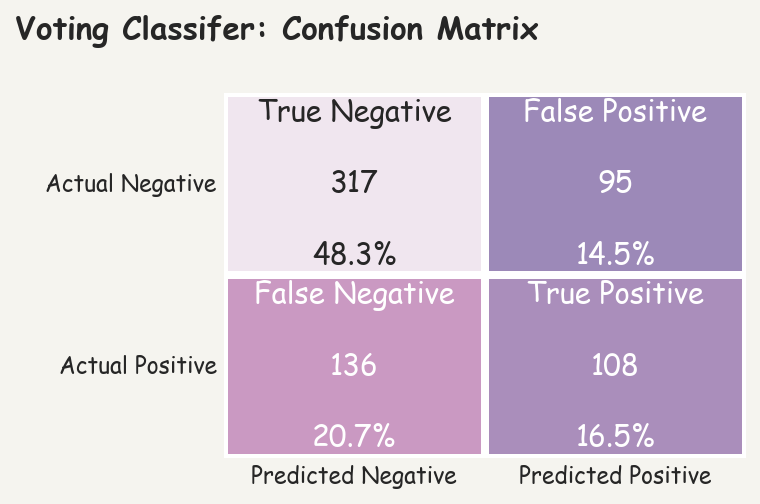

In [57]:
fig, ax = plt.subplots(1,1, figsize=(4,3), facecolor=background_color)

confusion = confusion_matrix(y_test, predictions)
    
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in confusion.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion, annot=labels, fmt='', cmap=colormap, linewidth=3, cbar=False,
           xticklabels=['Predicted Negative','Predicted Positive'],
           yticklabels=['Actual Negative', 'Actual Positive'], ax=ax)

ax.tick_params(which='both', axis='both', length=0)
plt.yticks(rotation=0) 

ax.text(-0.8,-0.3,'Voting Classifer: Confusion Matrix',fontsize=15, fontweight='bold')

plt.show()